<a href="https://colab.research.google.com/github/ttobaegi/ML_Python/blob/master/Ecommerce_Analysis_2021ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# drive를 colab에 연결해서 데이터 로딩하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd     # data preprocessing
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

plt.style.use('seaborn-whitegrid')

In [5]:
master=pd.read_csv('/content/drive/MyDrive/Project_2021/master1.csv', sep=',')

In [6]:
master.shape

(847634, 5)

In [18]:
master.head(1)

,pd_c,pd_nm,clac1_nm,clac2_nm,clac3_nm
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠


In [7]:
session=pd.read_csv('/content/drive/MyDrive/Project_2021/Session.csv', sep=',')

In [8]:
session.shape

(2712907, 9)

In [9]:
session.columns

Index(['CLNT_ID', 'SESS_ID', 'SESS_SEQ', 'SESS_DT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM'],
      dtype='object')

In [10]:
session.info() 
# date 변수 변환 필요 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CLNT_ID          int64  
 1   SESS_ID          int64  
 2   SESS_SEQ         int64  
 3   SESS_DT          int64  
 4   TOT_PAG_VIEW_CT  float64
 5   TOT_SESS_HR_V    object 
 6   DVC_CTG_NM       object 
 7   ZON_NM           object 
 8   CITY_NM          object 
dtypes: float64(1), int64(4), object(4)
memory usage: 186.3+ MB


In [45]:
pd.set_option('float_format','{:f}'.format)
session.describe()
# 201804-201809 6개월 session 데이터 

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT
count,2712907.000000,2712907.000000,2712907.000000,2712907.000000,2712633.000000
mean,3318866.710368,5796890.738461,178.130644,20180648.425562,85.167676
std,1914523.994231,3095032.611309,297.158311,166.288816,87.508775
min,8.000000,26.000000,1.000000,20180401.000000,1.000000
25%,1656959.000000,3220733.000000,14.000000,20180513.000000,29.000000
50%,3318627.000000,5967623.000000,59.000000,20180622.000000,55.000000
75%,4984705.500000,8421878.000000,211.000000,20180807.000000,108.000000
max,6592554.000000,10977941.000000,7020.000000,20180930.000000,499.000000


In [12]:
# date변수 str 변환 > apply lambda
session['SESS_DT']=session['SESS_DT'].apply(lambda s : str(s)[0:10])
session.describe()

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT
count,2.712907e+06,2.712907e+06,2.712907e+06,2.712633e+06
mean,3.318867e+06,5.796891e+06,1.781306e+02,8.516768e+01
std,1.914524e+06,3.095033e+06,2.971583e+02,8.750877e+01
min,8.000000e+00,2.600000e+01,1.000000e+00,1.000000e+00
25%,1.656959e+06,3.220733e+06,1.400000e+01,2.900000e+01
50%,3.318627e+06,5.967623e+06,5.900000e+01,5.500000e+01
75%,4.984706e+06,8.421878e+06,2.110000e+02,1.080000e+02
max,6.592554e+06,1.097794e+07,7.020000e+03,4.990000e+02


***How many Customers visit the site during the period ?***

In [21]:
# session.iloc[:,0].unique
visitors = session['CLNT_ID'].nunique()
print('visitors:{}'.format(visitors))

visitors:922737


***Visitors daily Trend : Does traffic flunctuate by date?***

In [19]:
session.drop_duplicates().groupby(['SESS_DT'])['CLNT_ID'].agg(['count'])

,count
SESS_DT,
20180401,19274
20180402,19775
20180403,18939
20180404,17879
20180405,16757
...,...
20180926,13361
20180927,13333
20180928,12667


In [20]:
session.drop_duplicates().groupby(['SESS_DT'])['CLNT_ID'].agg(['count']).sort_values(by=['SESS_DT'],ascending=True)

,count
SESS_DT,
20180401,19274
20180402,19775
20180403,18939
20180404,17879
20180405,16757
...,...
20180926,13361
20180927,13333
20180928,12667


In [23]:
visitors_by_date = session.drop_duplicates().groupby(['SESS_DT'])['CLNT_ID'].agg(['count']).sort_values(by=['SESS_DT'],ascending=True)

In [27]:
 from datetime import datetime

In [29]:
pd.Series(visitors_by_date.index.values).apply(lambda s: datetime.strptime(s,'%Y%m%d').date())

0      2018-04-01
1      2018-04-02
2      2018-04-03
3      2018-04-04
4      2018-04-05
          ...    
178    2018-09-26
179    2018-09-27
180    2018-09-28
181    2018-09-29
182    2018-09-30
Length: 183, dtype: object

In [30]:
visitors_by_date['count']

SESS_DT
20180401    19274
20180402    19775
20180403    18939
20180404    17879
20180405    16757
            ...  
20180926    13361
20180927    13333
20180928    12667
20180929    12108
20180930    14106
Name: count, Length: 183, dtype: int64

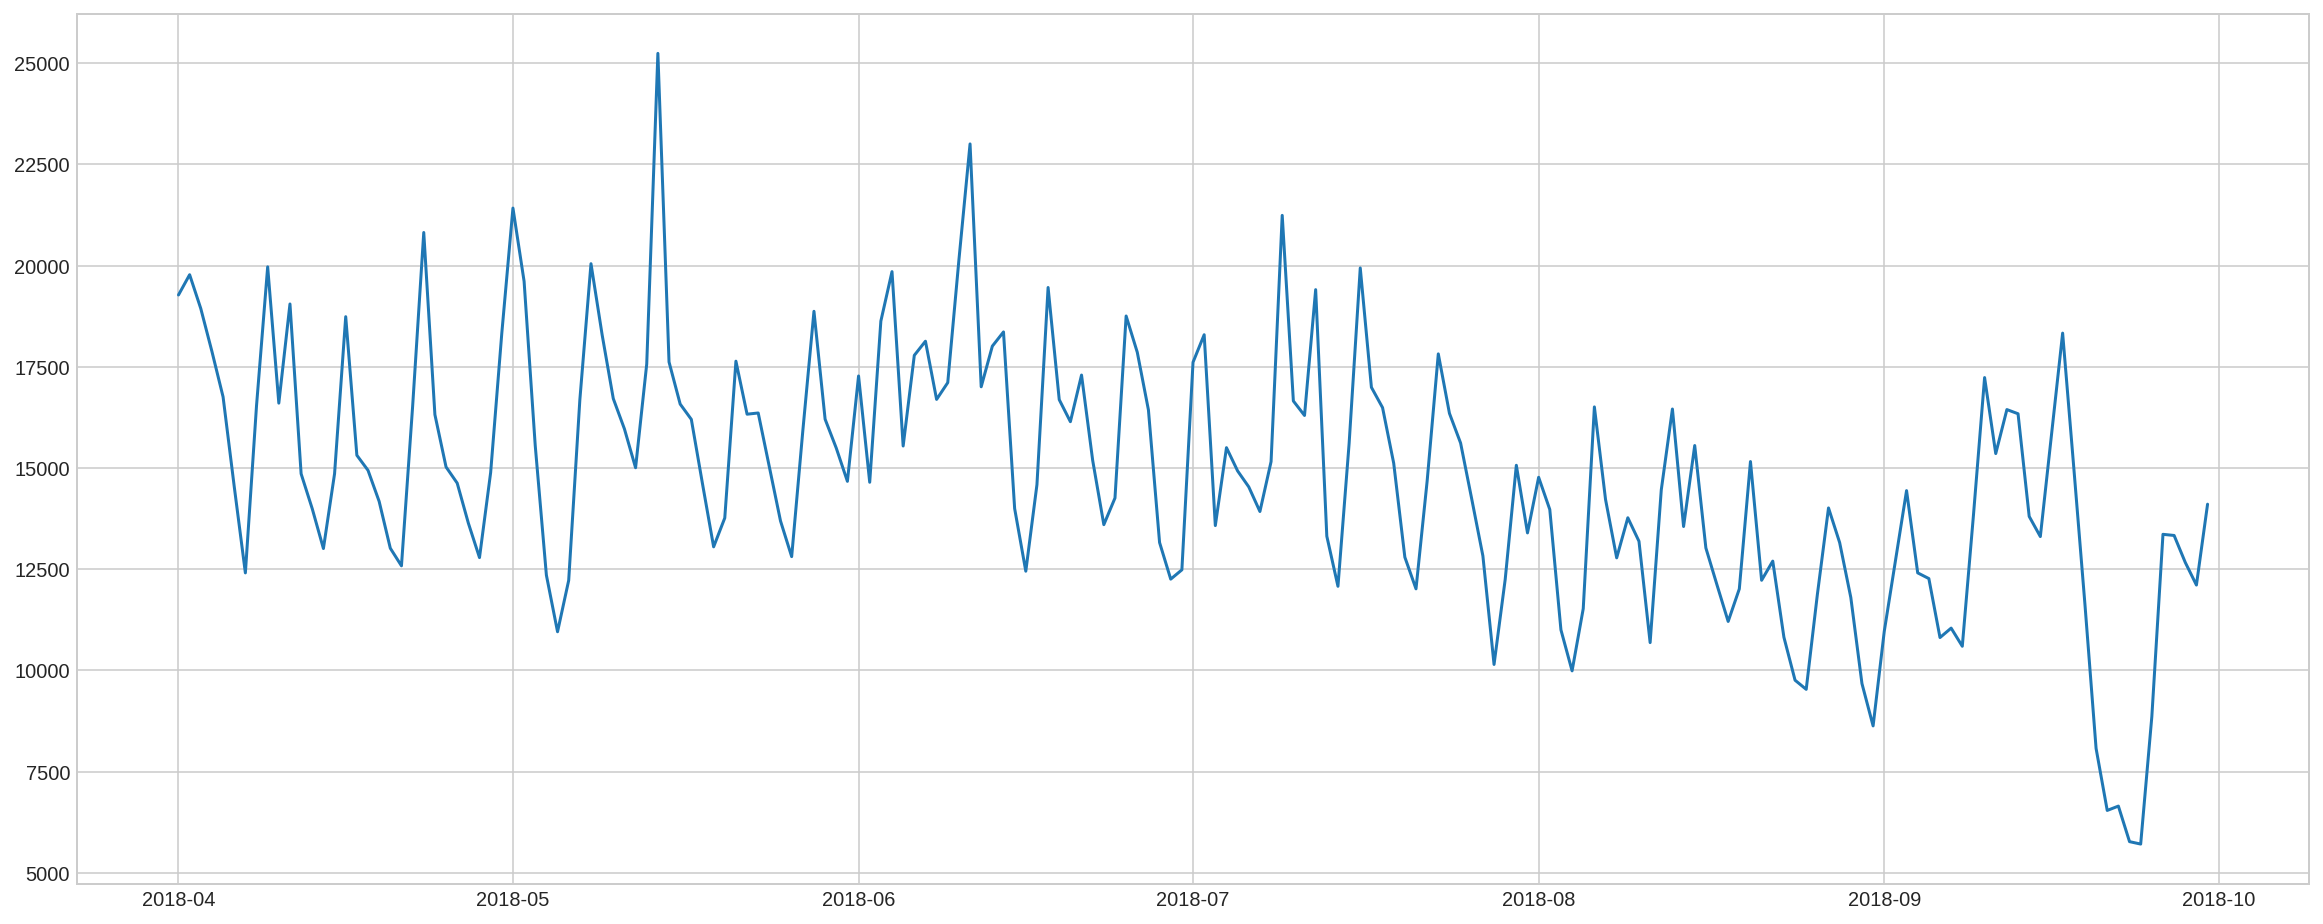

In [31]:
x = pd.Series(visitors_by_date.index.values).apply(lambda s: datetime.strptime(s,'%Y%m%d').date())
y = visitors_by_date['count']
plt.rcParams['figure.figsize']=(20,8)
plt.plot(x,y)
plt.show()

*Feature Engineering*